data set taken from: https://data.gov.sg/datasets?query=doctor&page=1&resultId=d_4a15de043d48bf829b6d97c6068bbf03

This dataset contains data about the number of doctors across public/private sector as well as those not in active practice. 

Doctors have always been known to have very long working hours. It has become increasingly worrysome as this may not be safe for many patients if their doctor has not had enough rest. To better understand the situation,

we seek to answer: 
1. Why do doctors work so long hours? Are we getting more doctors?
2. And if we are getting more doctors, are we getting too many patients?
3. Are most doctors moving to private sector after they served their bond? (resulting in the manpower crunch in the public sector)

### Initial Data Exploration

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("NumberofDoctors.csv")

In [5]:
df.head()

,year,sector,specialist_non-specialist,count
0,2006,Public,na,3505
1,2006,Private,na,2966
2,2006,Not In Active Practice,na,460
3,2007,Public,na,3991
4,2007,Private,na,3004


In [7]:
df.describe()

,year,count
count,96.000000,96.00000
mean,2014.468750,2033.93750
std,4.688066,1576.84009
min,2006.000000,193.00000
25%,2010.750000,417.50000
50%,2014.500000,1827.50000
75%,2018.250000,2975.50000
max,2022.000000,5672.00000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   year                       96 non-null     int64 
 1   sector                     96 non-null     object
 2   specialist_non-specialist  96 non-null     object
 3   count                      96 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 3.1+ KB


In [12]:
df['sector'].unique()

array(['Public', 'Private', 'Not In Active Practice'], dtype=object)

In [58]:
df['sector'].value_counts()

sector
Public                    32
Private                   32
Not In Active Practice    32
Name: count, dtype: int64

In [13]:
df['specialist_non-specialist'].unique()

array(['na', 'Specialist', 'Non-Specialist'], dtype=object)

In [17]:
# rename column to shorter name
df = df.rename(columns = {'specialist_non-specialist' : 'specialist'})

In [18]:
df.head()

,year,sector,specialist,count
0,2006,Public,na,3505
1,2006,Private,na,2966
2,2006,Not In Active Practice,na,460
3,2007,Public,na,3991
4,2007,Private,na,3004


In [20]:
df['specialist'].value_counts()

specialist
Specialist        45
Non-Specialist    45
na                 6
Name: count, dtype: int64

In [21]:
df.head(10)

,year,sector,specialist,count
0,2006,Public,na,3505
1,2006,Private,na,2966
2,2006,Not In Active Practice,na,460
3,2007,Public,na,3991
4,2007,Private,na,3004
5,2007,Not In Active Practice,na,469
6,2008,Public,Specialist,1723
7,2008,Public,Non-Specialist,2574
8,2008,Private,Specialist,1046
9,2008,Private,Non-Specialist,2005


In [28]:
# get the total count of doctors
total_count_by_year = df.groupby('year')['count'].sum().reset_index()
total_count_by_year.rename(columns = {'count':'total_count'},inplace=True)

In [35]:
df = df.merge(total_count_by_year,on = 'year')

In [36]:
df.head()

,year,sector,specialist,count_x,count_y,total_count
0,2006,Public,na,3505,6931,6931
1,2006,Private,na,2966,6931,6931
2,2006,Not In Active Practice,na,460,6931,6931
3,2007,Public,na,3991,7464,7464
4,2007,Private,na,3004,7464,7464


In [43]:
df.rename(columns = {'count_x':'count'},inplace = True)

In [41]:
df.drop('count_y',axis = 1,inplace = True)

In [44]:
df

,year,sector,specialist,count,total_count
0,2006,Public,na,3505,6931
1,2006,Private,na,2966,6931
2,2006,Not In Active Practice,na,460,6931
3,2007,Public,na,3991,7464
4,2007,Private,na,3004,7464
...,...,...,...,...,...
91,2022,Public,Non-Specialist,5672,16009
92,2022,Private,Specialist,1800,16009
93,2022,Private,Non-Specialist,2882,16009
94,2022,Not In Active Practice,Specialist,425,16009


In [45]:
df['percent'] = df['count']/df['total_count']
df

,year,sector,specialist,count,total_count,percent
0,2006,Public,na,3505,6931,0.505699
1,2006,Private,na,2966,6931,0.427932
2,2006,Not In Active Practice,na,460,6931,0.066368
3,2007,Public,na,3991,7464,0.534700
4,2007,Private,na,3004,7464,0.402465
...,...,...,...,...,...,...
91,2022,Public,Non-Specialist,5672,16009,0.354301
92,2022,Private,Specialist,1800,16009,0.112437
93,2022,Private,Non-Specialist,2882,16009,0.180024
94,2022,Not In Active Practice,Specialist,425,16009,0.026548


# Are we getting more doctors?

### Analyse growth of number of doctors

<Axes: xlabel='year', ylabel='total_count'>

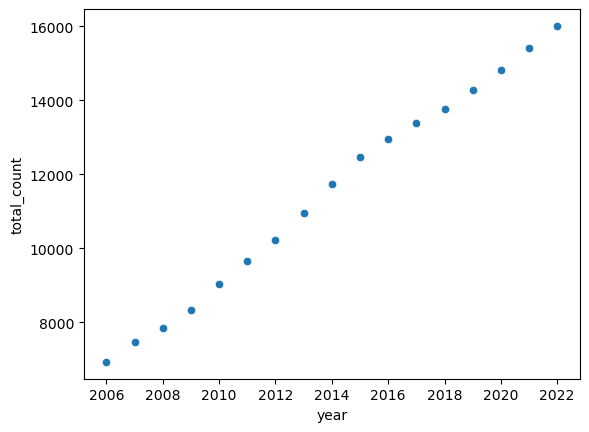

In [61]:
# scatterplot of total number of doctors over year
sns.scatterplot(data = df, x = df['year'], y = df['total_count'])

Since non-active doctors are included in this, naturally there will be an upward trend. Let's filter out non-active doctors

In [57]:
# data without doctors not in active practice
df1 = df.loc[(df['sector']!='Not In Active Practice')]
df1

,year,sector,specialist,count,total_count,percent
0,2006,Public,na,3505,6931,0.505699
1,2006,Private,na,2966,6931,0.427932
3,2007,Public,na,3991,7464,0.534700
4,2007,Private,na,3004,7464,0.402465
6,2008,Public,Specialist,1723,7841,0.219742
...,...,...,...,...,...,...
87,2021,Private,Non-Specialist,2825,15423,0.183168
90,2022,Public,Specialist,4474,16009,0.279468
91,2022,Public,Non-Specialist,5672,16009,0.354301
92,2022,Private,Specialist,1800,16009,0.112437


In [66]:
df1.drop(["total_count_x","total_count_y",'percent','total_count'],axis = 1,inplace=True)

In [67]:
# recreate total_count column
total_count_by_year = df1.groupby('year')['count'].sum().reset_index()
total_count_by_year.rename(columns = {'count':'total_count'},inplace=True)
df1 = df1.merge(total_count_by_year,on = 'year')
df1.tail()

,year,sector,specialist,count,total_count
59,2021,Private,Non-Specialist,2825,14445
60,2022,Public,Specialist,4474,14828
61,2022,Public,Non-Specialist,5672,14828
62,2022,Private,Specialist,1800,14828
63,2022,Private,Non-Specialist,2882,14828


<Axes: xlabel='year', ylabel='total_count'>

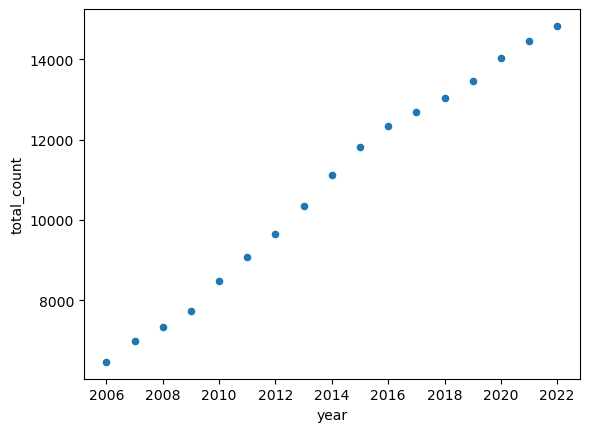

In [73]:
total_count_by_year.plot(x = 'year',y = 'total_count',kind = 'scatter')

we notice a similar trend despite removing inactive doctors, which tells us that we are getting more and more doctors year on year

In [90]:
# drop years 2006 and 2007 since we dont have specialist data for those years
df2 = df.loc[(df['year'] != 2006) & (df['year'] != 2007)]
df2

,year,sector,specialist,count,total_count,percent
6,2008,Public,Specialist,1723,7841,0.219742
7,2008,Public,Non-Specialist,2574,7841,0.328274
8,2008,Private,Specialist,1046,7841,0.133401
9,2008,Private,Non-Specialist,2005,7841,0.255707
10,2008,Not In Active Practice,Specialist,193,7841,0.024614
...,...,...,...,...,...,...
91,2022,Public,Non-Specialist,5672,16009,0.354301
92,2022,Private,Specialist,1800,16009,0.112437
93,2022,Private,Non-Specialist,2882,16009,0.180024
94,2022,Not In Active Practice,Specialist,425,16009,0.026548


<Axes: xlabel='year', ylabel='count'>

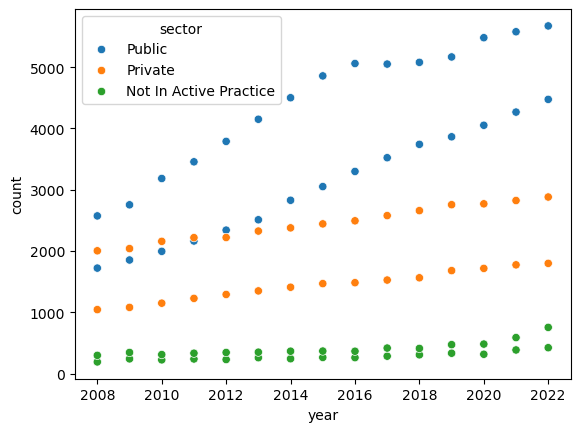

In [106]:
sns.scatterplot(df2,x='year',y='count',hue = 'sector')

there are 2 sets of each sector because of the specialisation, need to group

<Axes: >

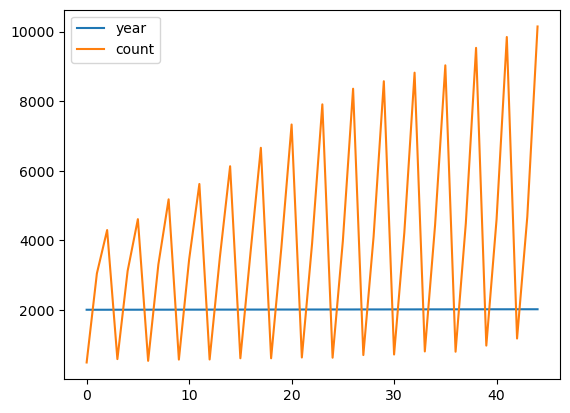

In [170]:
# group by year and sector
grouped_data = df2.groupby(['year','sector'])['count'].sum().reset_index()
grouped_data.plot()

<Axes: xlabel='year'>

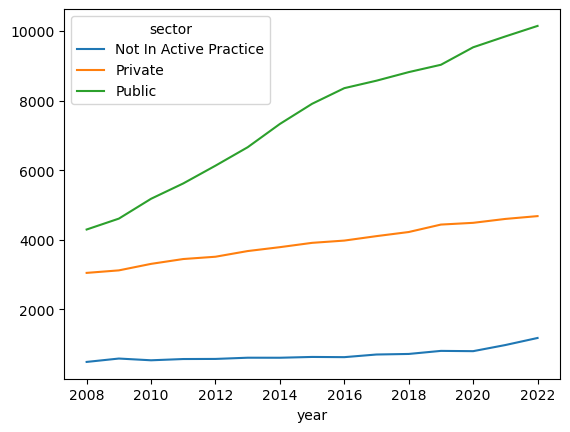

In [168]:
pivot_data = grouped_data.pivot_table(index = 'year', columns = 'sector', values = 'count',fill_value=0)
pivot_data.plot()

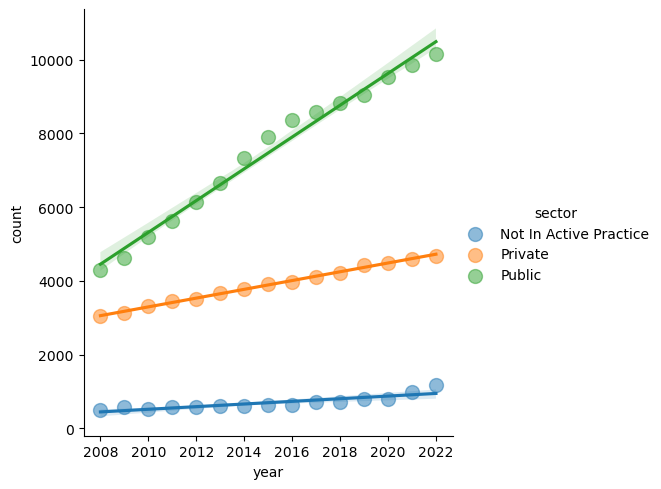

In [306]:
sns.lmplot(data = grouped_data, x = 'year', y = 'count', hue = 'sector',scatter_kws={'s': 100,'alpha':0.5})

we observe that there is a faster growing number of doctors in the public sector compared to the private sector. There is also a slow upward trend of inactive doctors which is to be expected as some would retire/change industries. 

#### now lets compare specialists and non-specialists

In [108]:
df3 = df.groupby(['year','specialist'])['count'].sum().reset_index()

In [113]:
# drop 2006 and 2007
df3 = df3.loc[(df['year'] != 2006) & (df['year'] != 2007)]

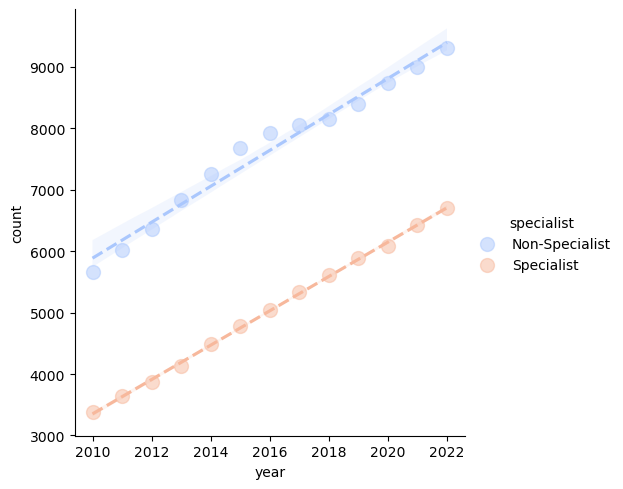

In [307]:
sns.lmplot(x='year', y='count', data=df3, hue='specialist',line_kws = {'linestyle':'--'},scatter_kws={'s': 100,'alpha':0.5},palette = 'coolwarm')

since there is almost identical growth in the numbers of specialists and non-specialists, and there is a requirement that one must first become a medical doctor and then undergo accreditation by the Specialists Accreditation Board (SAB), it seems that nearly all doctors embark on this route

therefore, we are having an increasing number of doctors, both specialists and non-specialists. So why does there seem to be an increasing perception that we have a lack of doctors?

### Analysis of population data and number of doctors to people

to answer that, let us investigate the doctor to patient ratio, as well as the overall population 

dataset for medical practitioner per 10000 population: https://data.gov.sg/datasets?query=medical&page=1&resultId=d_a9800ace0c5a6048ff2b9d06c9d602b6

dataset for indicators of population: https://tablebuilder.singstat.gov.sg/table/TS/M810001

In [125]:
# read data
medi_df = pd.read_csv("MedicalPractitionerPer10000TotalPopulation.csv")
pop_df = pd.read_csv("PopulationData.csv")

### Initial Data Exploration of doctors per 10,000 people

In [128]:
medi_df.head()

,year,level_1,value
0,1960,"Doctors Per 10,000 Total Population",4
1,1960,"Dentists Per 10,000 Total Population",2
2,1960,"Nurses Per 10,000 Total Population",na
3,1961,"Doctors Per 10,000 Total Population",4
4,1961,"Dentists Per 10,000 Total Population",2


In [180]:
medi_df.tail()

,year,num,value
165,2015,"Doctors Per 10,000 Total Population",23
168,2016,"Doctors Per 10,000 Total Population",23
171,2017,"Doctors Per 10,000 Total Population",24
174,2018,"Doctors Per 10,000 Total Population",24
177,2019,"Doctors Per 10,000 Total Population",25


In [133]:
medi_df['level_1'].unique()

array(['Doctors Per 10,000 Total Population',
       'Dentists Per 10,000 Total Population',
       'Nurses Per 10,000 Total Population'], dtype=object)

In [134]:
medi_df['level_1'].value_counts()

level_1
Doctors Per 10,000 Total Population     60
Dentists Per 10,000 Total Population    60
Nurses Per 10,000 Total Population      60
Name: count, dtype: int64

In [137]:
# drop dentists and nurses
medi_df = medi_df.loc[(medi_df['level_1'] == 'Doctors Per 10,000 Total Population')]

In [140]:
medi_df.rename(columns = {'level_1':'num'},inplace = True)

In [151]:
medi_df['value'] = medi_df['value'].astype('int')

Text(0.5, 1.0, 'No. of Doctors per 10,000 people')

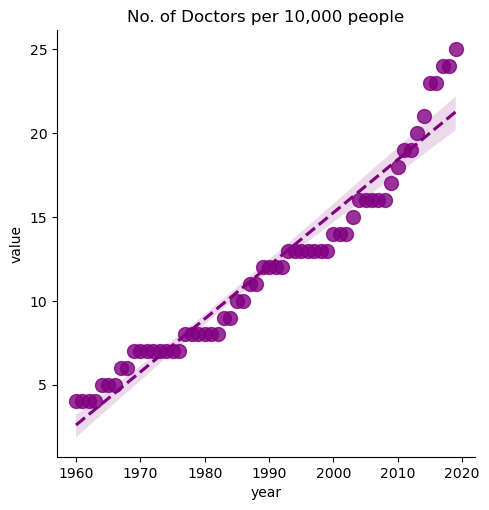

In [334]:
sns.lmplot(medi_df,x = 'year',y='value',line_kws = {'color':'purple','linestyle':'--'},scatter_kws = {'color':'purple','s':100})
plt.title('No. of Doctors per 10,000 people')

<Axes: xlabel='year', ylabel='value'>

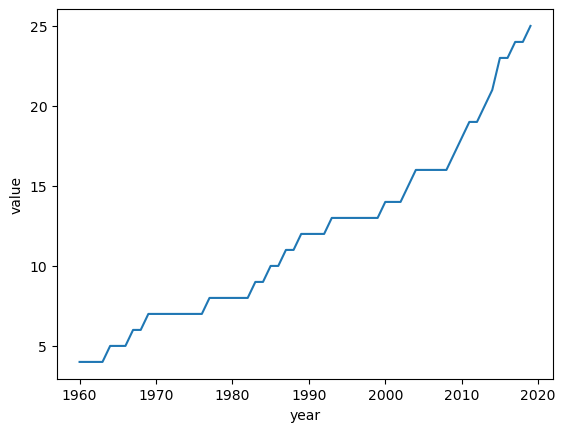

In [336]:
sns.lineplot(x = 'year', y = 'value', data = medi_df)

it seems like the number of doctors per 10,000 people have increased significantly over the years, meaning we are getting more doctors overall in proportion to population

Therefore, yes we are getting more doctors and at a seemingly increasing rate. Let's look at intakes for Medicine as well

#### Medicine intakes

dataset taken from: https://data.gov.sg/datasets/d_6b264092cd066c55d8e2db9e68e7ffdb/view

In [348]:
# import data
intake_df = pd.read_csv("UniversitiesIntakeEnrolmentandGraduatesbyCourse.csv")

In [350]:
intake_df.head()

,year,sex,course,intake,enrolment,graduates
0,2005,MF,Accountancy,876,2561,706
1,2005,F,Accountancy,530,1732,495
2,2005,MF,"Architecture, Building & Real Estate",299,1310,180
3,2005,F,"Architecture, Building & Real Estate",175,786,106
4,2005,MF,Business & Administration,1545,5013,1256


In [354]:
intake_df = intake_df.loc[intake_df['course'] == 'Medicine']

<Axes: xlabel='year', ylabel='intake'>

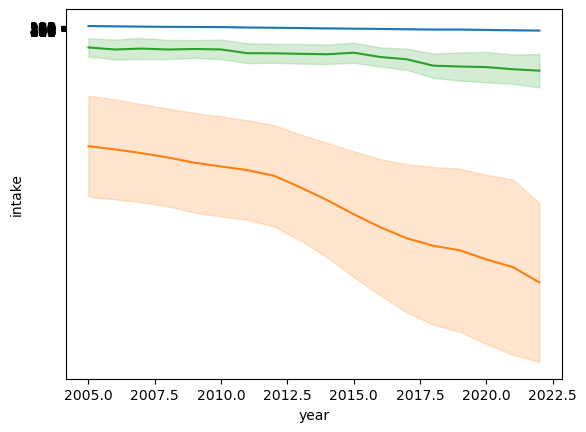

In [359]:
sns.lineplot(x = 'year', y = 'intake', data = intake_df)
sns.lineplot(x = 'year', y = 'enrolment', data = intake_df)
sns.lineplot(x = 'year', y = 'graduates', data = intake_df)

In [360]:
intake_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 24 to 535
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       36 non-null     int64 
 1   sex        36 non-null     object
 2   course     36 non-null     object
 3   intake     36 non-null     object
 4   enrolment  36 non-null     int64 
 5   graduates  36 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 2.0+ KB


In [361]:
intake_df['intake'] = intake_df['intake'].astype('int')

/var/folders/8_/27mx48454316tgvpbzqzsxr00000gn/T/ipykernel_86148/4024932581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  intake_df['intake'] = intake_df['intake'].astype('int')


In [362]:
intake_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 36 entries, 24 to 535
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   year       36 non-null     int64 
 1   sex        36 non-null     object
 2   course     36 non-null     object
 3   intake     36 non-null     int64 
 4   enrolment  36 non-null     int64 
 5   graduates  36 non-null     int64 
dtypes: int64(4), object(2)
memory usage: 2.0+ KB


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


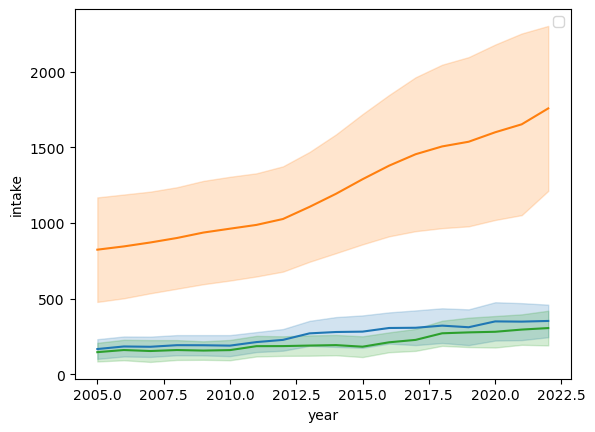

In [366]:
sns.lineplot(x = 'year', y = 'intake', data = intake_df)
sns.lineplot(x = 'year', y = 'enrolment', data = intake_df)
sns.lineplot(x = 'year', y = 'graduates', data = intake_df)

plt.legend()
plt.show()

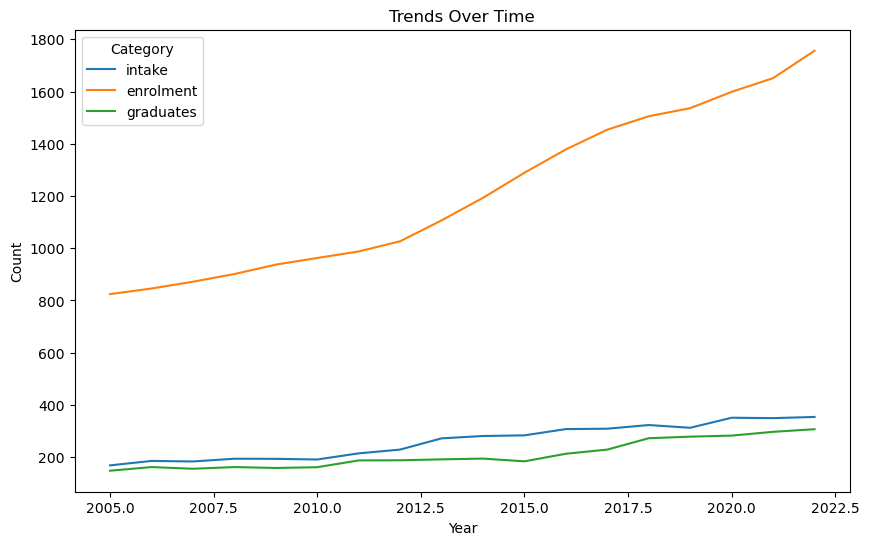

In [370]:
# Melt the DataFrame to have a long-form DataFrame suitable for hue
intake_df_melted = intake_df.melt(id_vars='year', value_vars=['intake', 'enrolment', 'graduates'], 
                                   var_name='category', value_name='value')

# Plot with seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='value', hue='category', data=intake_df_melted, errorbar = None)

# Add titles and labels
plt.title('Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Category')

# Show plot
plt.show()

Enrolments - people who register to be entered into the course
Intake - people who are accepted into the course
Graduate - people who graduate from the course

There is an faster increasing number of enrolments, suggesting an increasing interest in medicine. The number of intakes is increasing at a much much slower pace, with the disparity in enrolment vs intake numbers continuing to grow. 

We reach a multi-leveled problem where increasing the intakes significantly seems to be the solution to the manpower crunch, but in doing so may:
1. Potentially reduce doctor salaries by introducing more doctors
2. Potentially increase fees that people need to pay
3. Overwhelm hospitals with too many medical students
4. Incur significant costs needed to build faculty resources for more students
5. Compromise standards of medical education

#### Time series forecasting with simple linear regression for number of doctors

In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [388]:
medi_df['year'] = pd.to_numeric(medi_df['year'],errors = 'coerce')
medi_df['value'] = pd.to_numeric(medi_df['value'],errors = 'coerce')

In [408]:
y = medi_df['value']
X = medi_df[['year']]

In [394]:
medi_df.head()

,year,num,value
0,1960,"Doctors Per 10,000 Total Population",4
3,1961,"Doctors Per 10,000 Total Population",4
6,1962,"Doctors Per 10,000 Total Population",4
9,1963,"Doctors Per 10,000 Total Population",4
12,1964,"Doctors Per 10,000 Total Population",5


In [409]:
type(medi_df['value'])

pandas.core.series.Series

In [395]:
medi_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 0 to 177
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    60 non-null     int64 
 1   num     60 non-null     object
 2   value   60 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.9+ KB


In [410]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [411]:
lm = LinearRegression()

In [412]:
lm.fit(X_train,y_train)

LinearRegression()

In [418]:
print("Coefficients:", lm.coef_)
print("Intercept:", lm.intercept_)

Coefficients: [0.3142395]
Intercept: -613.1461719617863


In [415]:
predictions = lm.predict(X_test) 
# use test set for predictions since model was trained on train set

predictions
# predictions made by model

array([19.73218574, 14.7043537 ,  8.41956365, 18.47522773, 12.50467718,
       13.44739569,  7.79108465, 13.13315619, 21.30338325, 15.0185932 ,
       15.96131171,  6.21988714,  9.36228216, 17.21826972,  3.70597112,
       10.30500067,  8.73380315,  4.96292913])

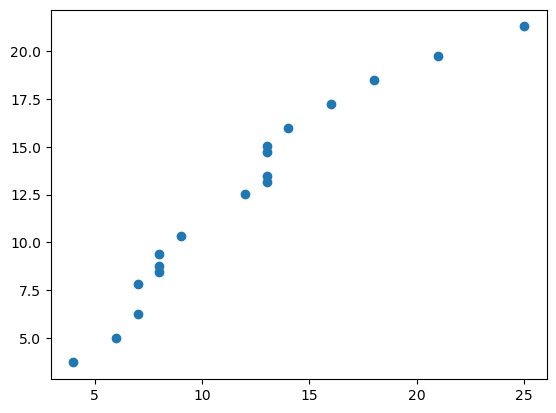

In [416]:
plt.scatter(y_test, predictions) 

seems like a pretty good model fit. Let's see how the the values are like 20 years into the future

In [426]:
# 20 years later
future_year = medi_df['year'].max() + 20

# create dataframe
future_df = pd.DataFrame({'year': [future_year]})

In [427]:
medi_df.tail()

,year,num,value
165,2015,"Doctors Per 10,000 Total Population",23
168,2016,"Doctors Per 10,000 Total Population",23
171,2017,"Doctors Per 10,000 Total Population",24
174,2018,"Doctors Per 10,000 Total Population",24
177,2019,"Doctors Per 10,000 Total Population",25


In [428]:
# Make prediction
future_value = lm.predict(future_df[['year']])

print(f"Predicted value for the year {future_year}: {future_value[0]}")

Predicted value for the year 2039: 27.588173294823378


Unfortunately, it seems that all else equal, we will be expecting 27-28 doctors per 10,000 people in the population in 20 years. And as the median age is also expected to continue to increase, the situation of overworked doctors does not seem like it will get much better if nothing more is done.

People have been saying for a long time now that Singapore has an aging population. Lets analyse the population data to be sure

# Too many patients?

In [188]:
pop_df.head()

,Data Series,2023,2022,2021,2020,2019,2018,2017,2016,2015,...,1959,1958,1957,1956,1955,1954,1953,1952,1951,1950
0,Total Population (Number),5917648.0,5637022.0,5453566.0,5685807.0,5703569.0,5638676.0,5612253.0,5607283.0,5535002.0,...,1587200,1518800,1445929,1371600,1305500,1248200,1191800,1127000,1068100,1022100
1,Resident Population (Number),4149253.0,4073239.0,3986842.0,4044210.0,4026209.0,3994283.0,3965796.0,3933559.0,3902690.0,...,na,na,na,na,na,na,na,na,na,na
2,Singapore Citizen Population (Number),3610658.0,3553749.0,3498191.0,3523191.0,3500940.0,3471936.0,3439177.0,3408943.0,3375023.0,...,na,na,na,na,na,na,na,na,na,na
3,Permanent Resident Population (Number),538595.0,519490.0,488651.0,521019.0,525269.0,522347.0,526619.0,524616.0,527667.0,...,na,na,na,na,na,na,na,na,na,na
4,Non-Resident Population (Number),1768395.0,1563783.0,1466724.0,1641597.0,1677360.0,1644393.0,1646457.0,1673724.0,1632312.0,...,na,na,na,na,na,na,na,na,na,na


In [189]:
pop_df = pop_df.transpose()

In [193]:
pop_df.index

Index(['Data Series', '2023', '2022', '2021', '2020', '2019', '2018', '2017',
       '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008',
       '2007', '2006', '2005', '2004', '2003', '2002', '2001', '2000', '1999',
       '1998', '1997', '1996', '1995', '1994', '1993', '1992', '1991', '1990',
       '1989', '1988', '1987', '1986', '1985', '1984', '1983', '1982', '1981',
       '1980', '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972',
       '1971', '1970', '1969', '1968', '1967', '1966', '1965', '1964', '1963',
       '1962', '1961', '1960', '1959', '1958', '1957', '1956', '1955', '1954',
       '1953', '1952', '1951', '1950'],
      dtype='object')

In [196]:
pop_df.head()

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
Data Series,Total Population (Number),Resident Population (Number),Singapore Citizen Population (Number),Permanent Resident Population (Number),Non-Resident Population (Number),Total Population Growth (Per Cent),Resident Population Growth (Per Cent),Population Density (Total Population Per Squar...,Sex Ratio (Males Per Thousand Females),Median Age Of Resident Population (Years),...,Old-Age Support Ratio: Citizens Aged 15-64 Yea...,Age Dependency Ratio: Citizens Aged Under 15 Y...,Child Dependency Ratio: Citizens Aged Under 15...,Old-Age Dependency Ratio: Citizens Aged 65 Yea...,Old-Age Support Ratio: Citizens Aged 20-64 Yea...,Age Dependency Ratio: Citizens Aged Under 20 Y...,Child Dependency Ratio: Citizens Aged Under 20...,Old-Age Dependency Ratio: Citizens Aged 65 Yea...,Resident Natural Increase (Number),Rate Of Natural Increase (Per Thousand Residents)
2023,5917648.0,4149253.0,3610658.0,538595.0,1768395.0,5.0,1.9,8058.0,950.0,42.4,...,3.5,51.1,22.3,28.9,3.2,63.9,32.6,31.3,4951.0,1.2
2022,5637022.0,4073239.0,3553749.0,519490.0,1563783.0,3.4,2.2,7688.0,955.0,42.1,...,3.6,50.0,22.4,27.6,3.3,62.7,32.8,29.9,6704.0,1.6
2021,5453566.0,3986842.0,3498191.0,488651.0,1466724.0,-4.1,-1.4,7485.0,960.0,41.8,...,3.8,48.7,22.5,26.2,3.5,61.4,33.0,28.5,10913.0,2.7
2020,5685807.0,4044210.0,3523191.0,521019.0,1641597.0,-0.3,0.4,7810.0,957.0,41.5,...,4.1,46.8,22.2,24.6,3.7,59.7,32.9,26.8,13248.0,3.3


In [197]:
new_header = pop_df.iloc[0] #grab the first row for the header
pop_df = pop_df[1:] #take the data less the header row
pop_df.columns = new_header #set the header row as the df header

In [198]:
pop_df.head()

Data Series,Total Population (Number),Resident Population (Number),Singapore Citizen Population (Number),Permanent Resident Population (Number),Non-Resident Population (Number),Total Population Growth (Per Cent),Resident Population Growth (Per Cent),Population Density (Total Population Per Square Kilometre),Sex Ratio (Males Per Thousand Females),Median Age Of Resident Population (Years),...,Old-Age Support Ratio: Citizens Aged 15-64 Years Per Citizen Aged 65 Years & Over (Number),Age Dependency Ratio: Citizens Aged Under 15 Years And 65 Years & Over Per Hundred Citizens Aged 15-64 Years (Number),Child Dependency Ratio: Citizens Aged Under 15 Years Per Hundred Citizens Aged 15-64 Years (Number),Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 15-64 Years (Number),Old-Age Support Ratio: Citizens Aged 20-64 Years Per Citizen Aged 65 Years & Over (Number),Age Dependency Ratio: Citizens Aged Under 20 Years And 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number),Child Dependency Ratio: Citizens Aged Under 20 Years Per Hundred Citizens Aged 20-64 Years (Number),Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number),Resident Natural Increase (Number),Rate Of Natural Increase (Per Thousand Residents)
2023,5917648.0,4149253.0,3610658.0,538595.0,1768395.0,5.0,1.9,8058.0,950.0,42.4,...,3.5,51.1,22.3,28.9,3.2,63.9,32.6,31.3,4951.0,1.2
2022,5637022.0,4073239.0,3553749.0,519490.0,1563783.0,3.4,2.2,7688.0,955.0,42.1,...,3.6,50.0,22.4,27.6,3.3,62.7,32.8,29.9,6704.0,1.6
2021,5453566.0,3986842.0,3498191.0,488651.0,1466724.0,-4.1,-1.4,7485.0,960.0,41.8,...,3.8,48.7,22.5,26.2,3.5,61.4,33.0,28.5,10913.0,2.7
2020,5685807.0,4044210.0,3523191.0,521019.0,1641597.0,-0.3,0.4,7810.0,957.0,41.5,...,4.1,46.8,22.2,24.6,3.7,59.7,32.9,26.8,13248.0,3.3
2019,5703569.0,4026209.0,3500940.0,525269.0,1677360.0,1.2,0.8,7866.0,957.0,41.1,...,4.3,45.2,22.0,23.2,4.0,58.4,33.1,25.3,15042.0,3.7


In [204]:
pop_df = pop_df.reset_index().rename_axis(None, axis=1)
pop_df

,level_0,index,Total Population (Number),Resident Population (Number),Singapore Citizen Population (Number),Permanent Resident Population (Number),Non-Resident Population (Number),Total Population Growth (Per Cent),Resident Population Growth (Per Cent),Population Density (Total Population Per Square Kilometre),...,Old-Age Support Ratio: Citizens Aged 15-64 Years Per Citizen Aged 65 Years & Over (Number),Age Dependency Ratio: Citizens Aged Under 15 Years And 65 Years & Over Per Hundred Citizens Aged 15-64 Years (Number),Child Dependency Ratio: Citizens Aged Under 15 Years Per Hundred Citizens Aged 15-64 Years (Number),Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 15-64 Years (Number),Old-Age Support Ratio: Citizens Aged 20-64 Years Per Citizen Aged 65 Years & Over (Number),Age Dependency Ratio: Citizens Aged Under 20 Years And 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number),Child Dependency Ratio: Citizens Aged Under 20 Years Per Hundred Citizens Aged 20-64 Years (Number),Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number),Resident Natural Increase (Number),Rate Of Natural Increase (Per Thousand Residents)
0,0,2023,5917648.0,4149253.0,3610658.0,538595.0,1768395.0,5.0,1.9,8058.0,...,3.5,51.1,22.3,28.9,3.2,63.9,32.6,31.3,4951.0,1.2
1,1,2022,5637022.0,4073239.0,3553749.0,519490.0,1563783.0,3.4,2.2,7688.0,...,3.6,50.0,22.4,27.6,3.3,62.7,32.8,29.9,6704.0,1.6
2,2,2021,5453566.0,3986842.0,3498191.0,488651.0,1466724.0,-4.1,-1.4,7485.0,...,3.8,48.7,22.5,26.2,3.5,61.4,33.0,28.5,10913.0,2.7
3,3,2020,5685807.0,4044210.0,3523191.0,521019.0,1641597.0,-0.3,0.4,7810.0,...,4.1,46.8,22.2,24.6,3.7,59.7,32.9,26.8,13248.0,3.3
4,4,2019,5703569.0,4026209.0,3500940.0,525269.0,1677360.0,1.2,0.8,7866.0,...,4.3,45.2,22.0,23.2,4.0,58.4,33.1,25.3,15042.0,3.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,69,1954,1248200,na,na,na,na,4.7,na,na,...,na,na,na,na,na,na,na,na,46239,37.1
70,70,1953,1191800,na,na,na,na,5.7,na,na,...,na,na,na,na,na,na,na,na,42992,36.1
71,71,1952,1127000,na,na,na,na,5.5,na,na,...,na,na,na,na,na,na,na,na,39136,34.7
72,72,1951,1068100,na,na,na,na,4.5,na,na,...,na,na,na,na,na,na,na,na,35735,33.4


In [209]:
pop_df = pop_df.rename(columns = {'index':'year'})
pop_df.head()

,year,Total Population (Number),Resident Population (Number),Singapore Citizen Population (Number),Permanent Resident Population (Number),Non-Resident Population (Number),Total Population Growth (Per Cent),Resident Population Growth (Per Cent),Population Density (Total Population Per Square Kilometre),Sex Ratio (Males Per Thousand Females),...,Old-Age Support Ratio: Citizens Aged 15-64 Years Per Citizen Aged 65 Years & Over (Number),Age Dependency Ratio: Citizens Aged Under 15 Years And 65 Years & Over Per Hundred Citizens Aged 15-64 Years (Number),Child Dependency Ratio: Citizens Aged Under 15 Years Per Hundred Citizens Aged 15-64 Years (Number),Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 15-64 Years (Number),Old-Age Support Ratio: Citizens Aged 20-64 Years Per Citizen Aged 65 Years & Over (Number),Age Dependency Ratio: Citizens Aged Under 20 Years And 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number),Child Dependency Ratio: Citizens Aged Under 20 Years Per Hundred Citizens Aged 20-64 Years (Number),Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number),Resident Natural Increase (Number),Rate Of Natural Increase (Per Thousand Residents)
0,2023,5917648.0,4149253.0,3610658.0,538595.0,1768395.0,5.0,1.9,8058.0,950.0,...,3.5,51.1,22.3,28.9,3.2,63.9,32.6,31.3,4951.0,1.2
1,2022,5637022.0,4073239.0,3553749.0,519490.0,1563783.0,3.4,2.2,7688.0,955.0,...,3.6,50.0,22.4,27.6,3.3,62.7,32.8,29.9,6704.0,1.6
2,2021,5453566.0,3986842.0,3498191.0,488651.0,1466724.0,-4.1,-1.4,7485.0,960.0,...,3.8,48.7,22.5,26.2,3.5,61.4,33.0,28.5,10913.0,2.7
3,2020,5685807.0,4044210.0,3523191.0,521019.0,1641597.0,-0.3,0.4,7810.0,957.0,...,4.1,46.8,22.2,24.6,3.7,59.7,32.9,26.8,13248.0,3.3
4,2019,5703569.0,4026209.0,3500940.0,525269.0,1677360.0,1.2,0.8,7866.0,957.0,...,4.3,45.2,22.0,23.2,4.0,58.4,33.1,25.3,15042.0,3.7


In [219]:
pop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 30 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype 
---  ------                                                                                                                   --------------  ----- 
 0   year                                                                                                                     74 non-null     object
 1   Total Population (Number)                                                                                                74 non-null     int64 
 2   Resident Population (Number)                                                                                             74 non-null     object
 3   Singapore Citizen Population (Number)                                                                                    74 non-null     object
 4 

In [214]:
type(pop_df['Total Population (Number)'])

pandas.core.series.Series

In [222]:
pop_df = pop_df.apply(pd.to_numeric, errors = 'coerce')

In [237]:
pop_df.columns

Index(['year', 'Total Population (Number)', 'Resident Population (Number)',
       'Singapore Citizen Population (Number)',
       'Permanent Resident Population (Number)',
       'Non-Resident Population (Number)',
       'Total Population Growth (Per Cent)',
       'Resident Population Growth (Per Cent)',
       'Population Density (Total Population Per Square Kilometre)',
       'Sex Ratio (Males Per Thousand Females)',
       'Median Age Of Resident Population (Years)',
       'Median Age Of Citizen Population (Years)',
       'Old-Age Support Ratio: Residents Aged 15-64 Years Per Resident Aged 65 Years & Over (Number)',
       'Age Dependency Ratio: Residents Aged Under 15 Years And 65 Years Per Hundred Residents Aged 15-64 Years (Number)',
       'Child Dependency Ratio: Residents Aged Under 15 Years Per Hundred Residents Aged 15-64 Years (Number)',
       'Old-Age Dependency Ratio: Residents Aged 65 Years & Over Per Hundred Residents Aged 15-64 Years (Number)',
       'Old-Age S

In [235]:
pop_df.isna().sum()

year                                                                                                                        0
Total Population (Number)                                                                                                   0
Resident Population (Number)                                                                                               29
Singapore Citizen Population (Number)                                                                                      38
Permanent Resident Population (Number)                                                                                     38
Non-Resident Population (Number)                                                                                           29
Total Population Growth (Per Cent)                                                                                          0
Resident Population Growth (Per Cent)                                                                                 

In [238]:
# grab the columns we want
columns = ['year', 'Total Population (Number)','Singapore Citizen Population (Number)',
       'Permanent Resident Population (Number)','Old-Age Dependency Ratio: Residents Aged 65 Years & Over Per Hundred Residents Aged 20-64 Years (Number)','Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number)',
        'Median Age Of Resident Population (Years)', 'Median Age Of Citizen Population (Years)']

In [254]:
pop_df = pop_df[columns]

In [259]:
pop_df.head()

,year,Total Population (Number),Singapore Citizen Population (Number),Permanent Resident Population (Number),Old-Age Dependency Ratio: Residents Aged 65 Years & Over Per Hundred Residents Aged 20-64 Years (Number),Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number),Median Age Of Resident Population (Years),Median Age Of Citizen Population (Years)
0,2023,5917648,3610658.0,538595.0,27.2,31.3,42.4,43.0
1,2022,5637022,3553749.0,519490.0,26.0,29.9,42.1,42.8
2,2021,5453566,3498191.0,488651.0,24.9,28.5,41.8,42.5
3,2020,5685807,3523191.0,521019.0,23.4,26.8,41.5,42.2
4,2019,5703569,3500940.0,525269.0,22.1,25.3,41.1,42.0


#### Total population and median age over time

Text(42.25000000000001, 0.5, 'Total Population in Millions')

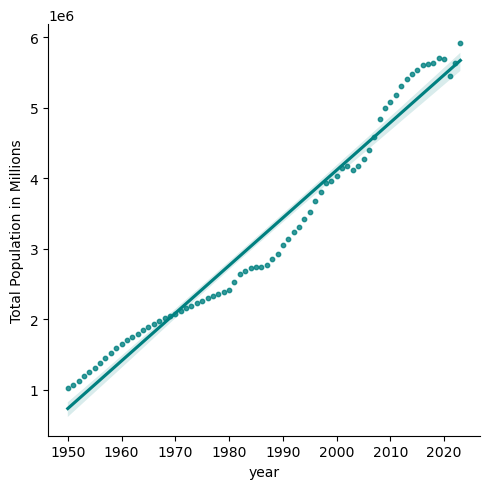

In [240]:
sns.lmplot(data = pop_df, x = 'year', y = 'Total Population (Number)',scatter_kws = {'color':'teal','s':10},line_kws = {'color':'teal'} )
plt.ylabel('Total Population in Millions')

a similar upward trend in total population

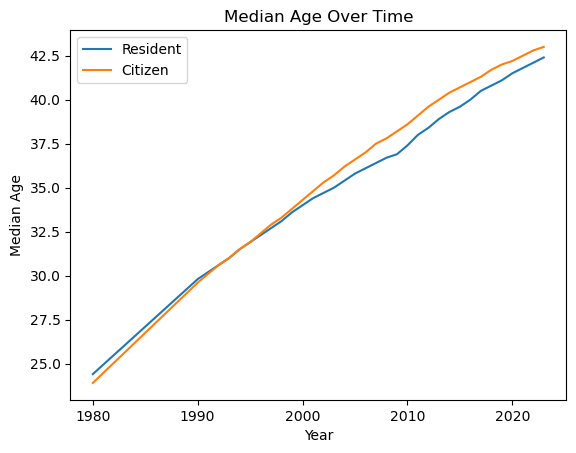

In [244]:
# Assuming your DataFrame is named 'df'
sns.lineplot(x='year', y='Median Age Of Resident Population (Years)', data=pop_df, label='Resident')
sns.lineplot(x='year', y='Median Age Of Citizen Population (Years)', data=pop_df, label='Citizen')

plt.title('Median Age Over Time')
plt.xlabel('Year')
plt.ylabel('Median Age')
plt.legend()
plt.show()

a quickly rising median age means we have a lot more elderly year over year, and includes both Citizens and PR

This linear increase in median age over the years is likely due to our rapidly growing country as well as improvements in healthcare, allowing for people to live longer.

#### Separate the data by Resident and Citizen

In [308]:
pop_df_res = pop_df[['year','Total Population (Number)','Permanent Resident Population (Number)','Old-Age Dependency Ratio: Residents Aged 65 Years & Over Per Hundred Residents Aged 20-64 Years (Number)','Median Age Of Resident Population (Years)']]

In [309]:
pop_df_cit = pop_df.drop(['Permanent Resident Population (Number)',
                          'Old-Age Dependency Ratio: Residents Aged 65 Years & Over Per Hundred Residents Aged 20-64 Years (Number)',
                          'Median Age Of Resident Population (Years)'],axis = 1)

In [310]:
pop_df1 = pd.merge(pop_df_res,pop_df_cit, on = 'year')

In [311]:
# separate values of PR and Citizen
pop_df_res['Type'] = 'PR'

pop_df_res = pop_df_res.rename(columns = {'Permanent Resident Population (Number)':'Population'
                                          ,'Old-Age Dependency Ratio: Residents Aged 65 Years & Over Per Hundred Residents Aged 20-64 Years (Number)':'Old-Age Dependency Ratio'
                                          ,'Median Age Of Resident Population (Years)':'Median Age'})

pop_df_cit['Type'] = 'Citizen'

pop_df_cit = pop_df_cit.rename(columns = {'Singapore Citizen Population (Number)':'Population'
                                          ,'Old-Age Dependency Ratio: Citizens Aged 65 Years & Over Per Hundred Citizens Aged 20-64 Years (Number)':'Old-Age Dependency Ratio'
                                          ,'Median Age Of Citizen Population (Years)':'Median Age'})

/var/folders/8_/27mx48454316tgvpbzqzsxr00000gn/T/ipykernel_86148/1697835971.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pop_df_res['Type'] = 'PR'


In [312]:
pop_df1 = pd.concat([pop_df_cit,pop_df_res])

In [313]:
pop_df1.head()

,year,Total Population (Number),Population,Old-Age Dependency Ratio,Median Age,Type
0,2023,5917648,3610658.0,31.3,43.0,Citizen
1,2022,5637022,3553749.0,29.9,42.8,Citizen
2,2021,5453566,3498191.0,28.5,42.5,Citizen
3,2020,5685807,3523191.0,26.8,42.2,Citizen
4,2019,5703569,3500940.0,25.3,42.0,Citizen


In [314]:
pop_df1 = pop_df1.sort_values('year', ascending = False)

In [315]:
pop_df1.head()

,year,Total Population (Number),Population,Old-Age Dependency Ratio,Median Age,Type
0,2023,5917648,3610658.0,31.3,43.0,Citizen
0,2023,5917648,538595.0,27.2,42.4,PR
1,2022,5637022,519490.0,26.0,42.1,PR
1,2022,5637022,3553749.0,29.9,42.8,Citizen
2,2021,5453566,488651.0,24.9,41.8,PR


In [323]:
pop_df1 = pop_df1.rename(columns = {'Total Population (Number)':'Total Population'})

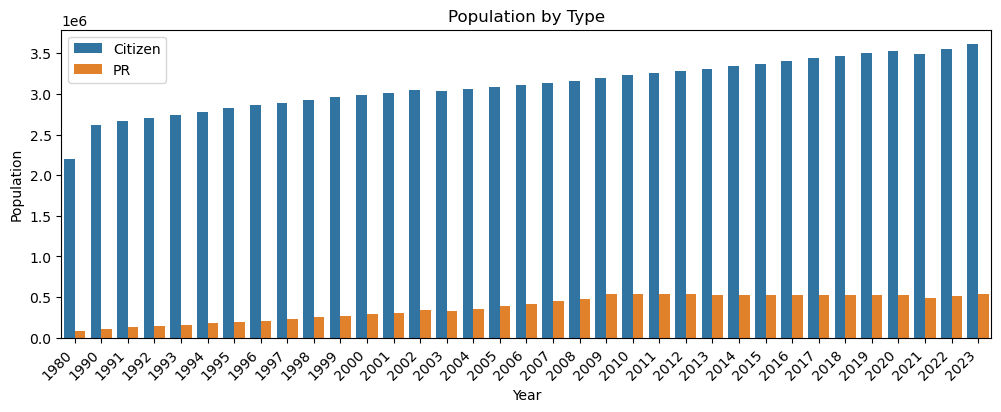

In [328]:
plt.figure(figsize = (12,4))
sns.barplot(x='year', y='Population', hue='Type', data=pop_df1)
plt.title('Population by Type')
plt.xlabel('Year')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Population')
plt.legend()
plt.show()

the number of citizens is constantly increasing, but it seems like the number of PRs have remained pretty stagnant over the last 15 years

<Axes: xlabel='year', ylabel='Population'>

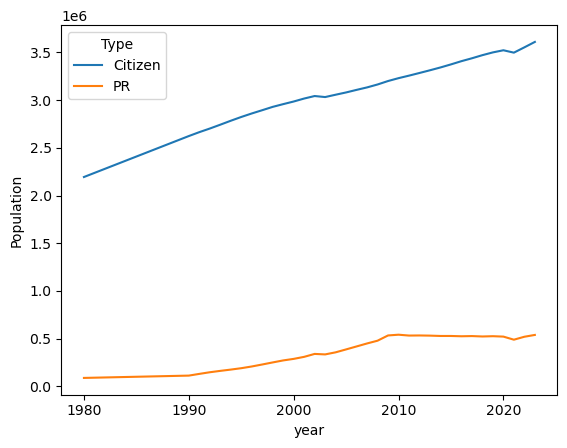

In [333]:
sns.lineplot(data = pop_df1, x='year',y = 'Population', hue = 'Type')

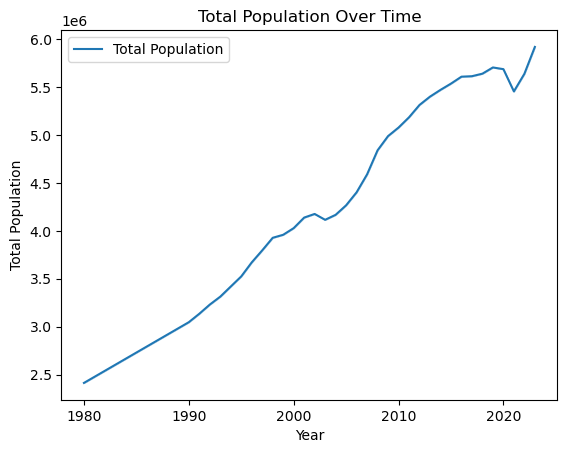

In [331]:
sns.lineplot(x='year', y='Total Population', data=pop_df1, label='Total Population')
plt.title('Total Population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend()
plt.show()

regardless, our overall population is still steadily increasing

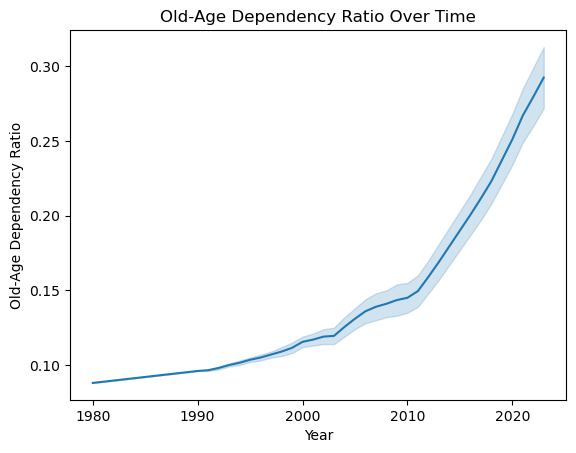

In [329]:
pop_df1['Old-Age Dependency Ratio'] = pop_df1['Old-Age Dependency Ratio'] / 100  # Convert to decimal
sns.lineplot(x='year', y='Old-Age Dependency Ratio', data=pop_df1)
plt.title('Old-Age Dependency Ratio Over Time')
plt.xlabel('Year')
plt.ylabel('Old-Age Dependency Ratio')
plt.show()

we are seeing an exponential growth in old-age dependency ratio, which is the ratio of a person Aged 65 Years & Over Per Hundred persons Aged 20-64 Years

This means that in 1980, where the OADR is about 0.5, there is 1 person over age 65 for every 20 people between 20-64 years old.
In 2010, there is about 1 elderly over 65 for every 6.7 people between 20-64
In 2023, it is now 1 elderly over 65 for every 3 people between 20-64

With an aging population and an increasing number of elderly, it is not surprising that while we are getting more doctors, and high doctor:people ratios, more elderly tends to mean more healthcare needed. 

Unfortunately, I am unable to obtain historical data on specific age groups and thus am unable to derive any insights into the specific growth in the different age groups over the years.

Therefore to answer question 2: "And if we are getting more doctors, are we getting too many patients?"

Based on the old-age dependency ratio, we are seeing a drastically increasing number of people enter the age group of above 65 years old. With this in mind, doctors may even be more overworked than ever. While we are unable to have definitive conclusion, the continually increase in complaints and cries from the doctors in public healthcare may signify that even more doctors are needed.

# Do all doctors move to private?

to tackle this question, we need to analyse the growth in doctors in public and private healthcare. It is actually a pretty simple question to answer. But this answer may help address the glaring issues in public healthcare - doctors having to put in >80 hr weeks. 

If there is an obvious trend that nearly all doctors move to private healthcare after serving their 5 year bond, there would obviously be a manpower shortage in public healthcare.

And actually we have already done the work to answer this.

In [339]:
df2

,year,sector,specialist,count,total_count,percent
6,2008,Public,Specialist,1723,7841,0.219742
7,2008,Public,Non-Specialist,2574,7841,0.328274
8,2008,Private,Specialist,1046,7841,0.133401
9,2008,Private,Non-Specialist,2005,7841,0.255707
10,2008,Not In Active Practice,Specialist,193,7841,0.024614
...,...,...,...,...,...,...
91,2022,Public,Non-Specialist,5672,16009,0.354301
92,2022,Private,Specialist,1800,16009,0.112437
93,2022,Private,Non-Specialist,2882,16009,0.180024
94,2022,Not In Active Practice,Specialist,425,16009,0.026548


<Axes: xlabel='year', ylabel='count'>

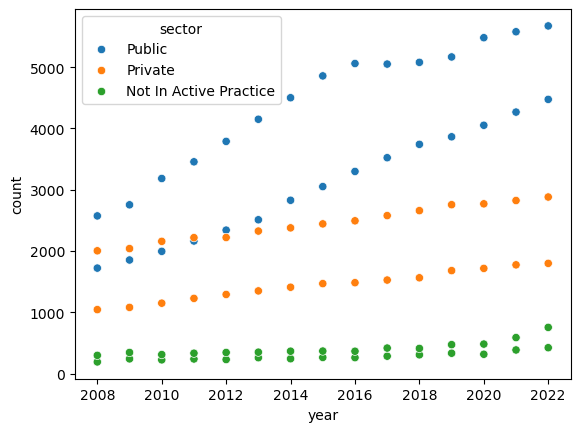

In [338]:
sns.scatterplot(df2,x='year',y='count',hue = 'sector')

In [343]:
doctor_data = df2.groupby(['year','sector'])['count'].sum().reset_index()

<Axes: xlabel='year', ylabel='count'>

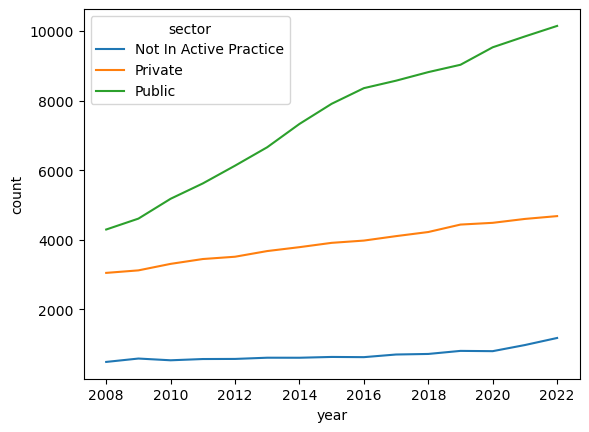

In [347]:
sns.lineplot(doctor_data, x = 'year', y = 'count', hue = 'sector')

Notable findings: 
1. Increasing number of doctors not in active practice in the last 3 years
2. Much faster growth in public sector doctors vs private
3. Basically linear trend in both private and public sector

With this, we can conclude that not all doctors move to private after serving their bond.

However, there may not be any significant tangible change in the manpower crunch in the public sector until we start to see a downward trend in the private sector and a sharper upward trend in the public sector. 

It may be the case that this situation has to happen for the accursed on-call system to finally be abolished.